In [1]:
from imports import *
%matplotlib inline

Welcome to JupyROOT 6.28/10


In [2]:
def loadTimes(files):
    """Load running time data from specified ROOT files."""
    runDF = CDataFrame("G4SettingsInfoDir/runtime", files)
    jobtime = runDF.AsNumpy(["Elapsed","UserCPU","SystemCPU","Threads","Events"])
    
    jobtime["ThreadCPU"] = jobtime["UserCPU"]/jobtime["Threads"]
    jobtime["ThreadSys"] = jobtime["SystemCPU"]/jobtime["Threads"]
    jobtime["Overhead"] = jobtime["Elapsed"]-(jobtime["ThreadCPU"]+jobtime["ThreadSys"])
    return jobtime

def loadSlurmCSV(datadir, prefix=None):
    """Reads hand-built CSV file constructed from Slurm statistics."""
    if prefix is None: prefix = "slurm"
    file = os.path.join(datadir, prefix+"_times.csv")
    jobtime = pd.read_csv(file,sep="\t")
    
    jobtime["Events"] = jobtime["Threads"]*5
    jobtime["ThreadCPU"] = jobtime["UserCPU"]/jobtime["Threads"]
    jobtime["ThreadSys"] = jobtime["SystemCPU"]/jobtime["Threads"]
    jobtime["Overhead"] = jobtime["Elapsed"]-(jobtime["ThreadCPU"]+jobtime["ThreadSys"])
    return jobtime
    
def plotTimes(jobtime,outdir,prefix=None):
    """Create scatter plot showing processing time vs. number of threads."""
    # All jobs should be identical
    nevents = np.unique(jobtime["Events"]/jobtime["Threads"])[0]
    
    plt.scatter(jobtime["Threads"],jobtime["Elapsed"],label="Total Elapsed")
    plt.scatter(jobtime["Threads"],jobtime["ThreadCPU"],label="CPU/thread")
    plt.scatter(jobtime["Threads"],jobtime["ThreadSys"],label="System/thread")
    plt.legend()

    title = f"DMC: {int(nevents)} events per thread"
    if prefix is not None: title += f" ({prefix})"
    plt.title(title)
    plt.xlabel("Geant4 Worker Threads")
    plt.ylabel("Time [s]")

    name = "threadTiming.png"
    if prefix is not None: name = prefix+"_"+name
    plt.savefig(os.path.join(outdir,name))
    
def timeVsThread(files,outdir,prefix=None):
    """Generate scatter plot of job time vs. number of threads."""
    jobtime = loadTimes(files)
    plotTimes(jobtime,outdir,prefix)

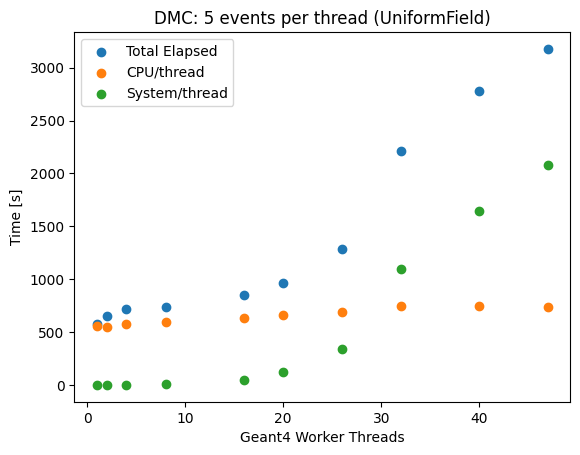

In [3]:
datadir = "data/threadTiming/EPotFiles"
files = glob.glob(os.path.join(datadir,"Uniform*.root"))
timeVsThread(files, datadir, "UniformField")

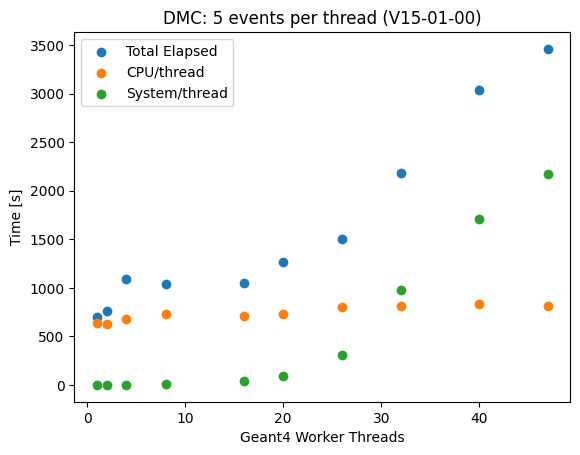

In [4]:
datadir = "data/threadTiming/V15-01-00"
files = glob.glob(os.path.join(datadir,"V15-01-00*.root"))
timeVsThread(files, datadir, "V15-01-00")

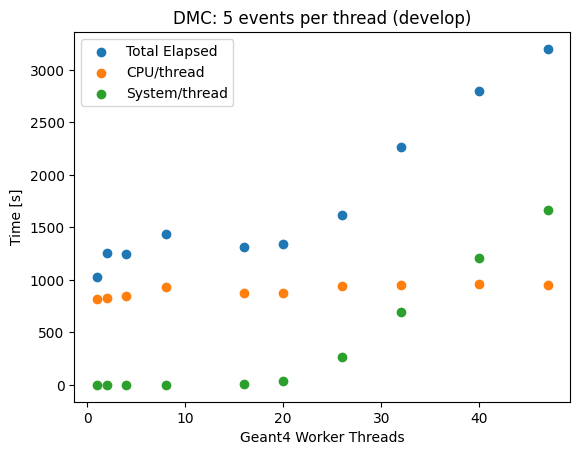

In [5]:
datadir = "data/threadTiming/develop"
files = glob.glob(os.path.join(datadir,"*.root"))
timeVsThread(files, datadir, "develop")

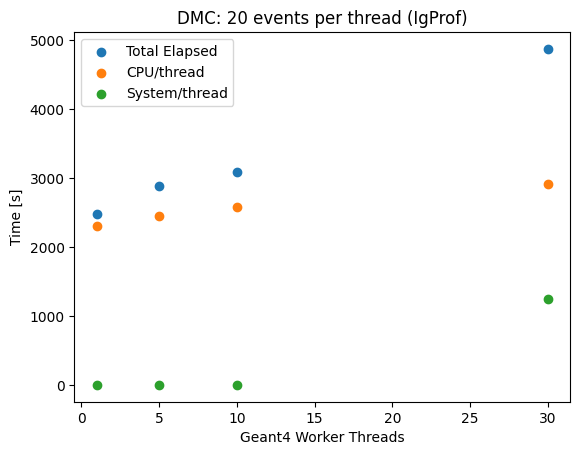

In [6]:
datadir = "data/threadTiming/Valgrind"
files = glob.glob(os.path.join(datadir,"IgProf*.root"))
timeVsThread(files, datadir, "IgProf")

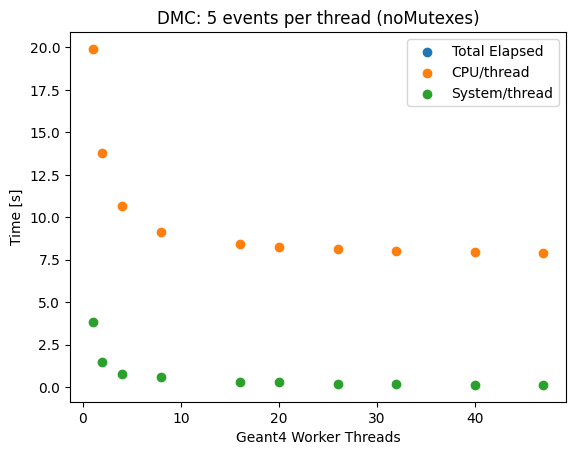

In [7]:
datadir = "data/threadTiming/elog2058"
jobtime = loadSlurmCSV(datadir, "noMutexes")
jobtime["Elapsed"] = [ None for i in range(len(jobtime["Threads"]))]

plotTimes(jobtime,datadir,"noMutexes")

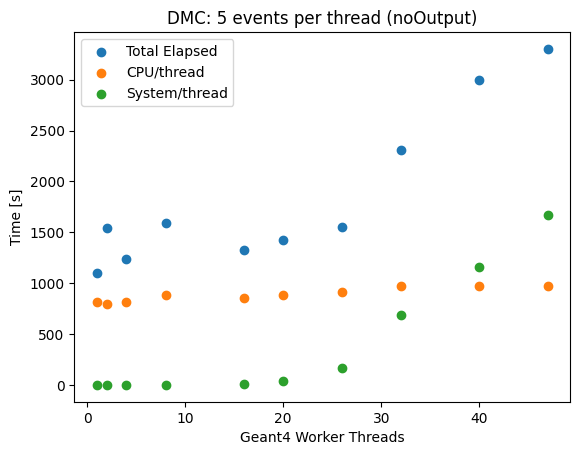

In [8]:
datadir = "data/threadTiming/elog2058"
jobtime = loadSlurmCSV(datadir, "noOutput")
plotTimes(jobtime,datadir,"noOutput")

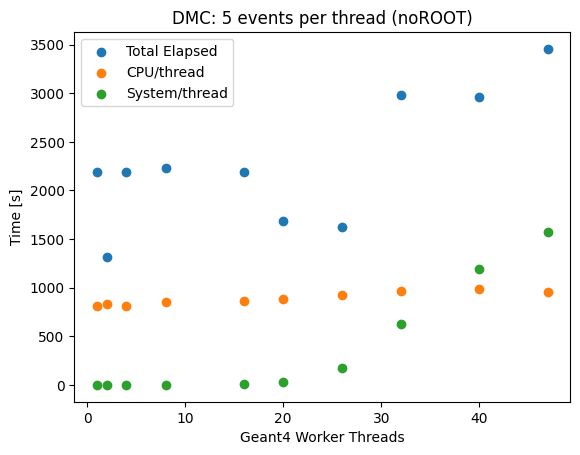

In [9]:
datadir = "data/threadTiming/elog2058"
jobtime = loadSlurmCSV(datadir, "noROOT")
plotTimes(jobtime,datadir,"noROOT")

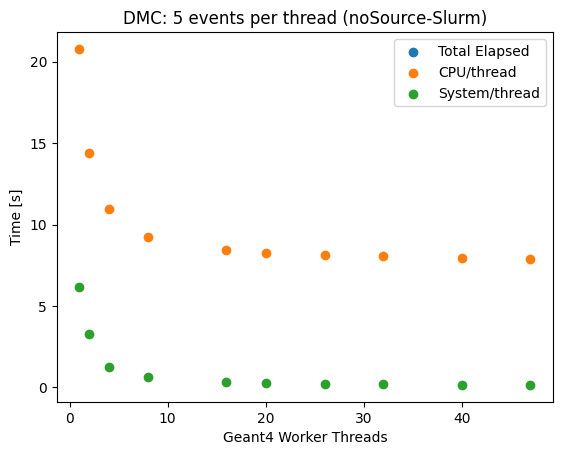

In [10]:
datadir = "data/threadTiming/elog2058"
jobtime = loadSlurmCSV(datadir, "noSource")
jobtime["Elapsed"] = [ None for i in range(len(jobtime["Threads"]))]

plotTimes(jobtime,datadir,"noSource-Slurm")

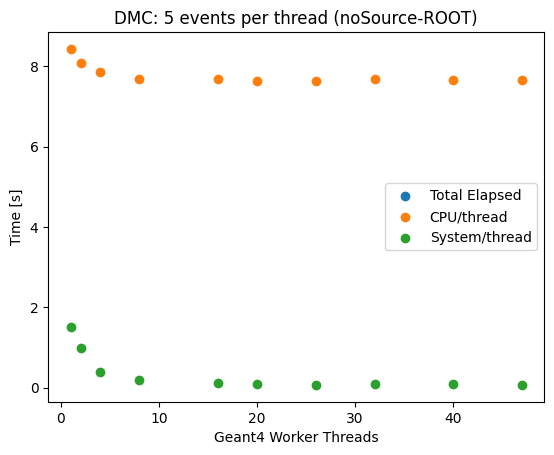

In [11]:
datadir = "data/threadTiming/elog2058"
files = glob.glob(os.path.join(datadir,"noSource*.root"))

jobtime = loadTimes(files)
jobtime["Elapsed"] = [ None for i in range(len(jobtime["Threads"]))]

plotTimes(jobtime,datadir,"noSource-ROOT")

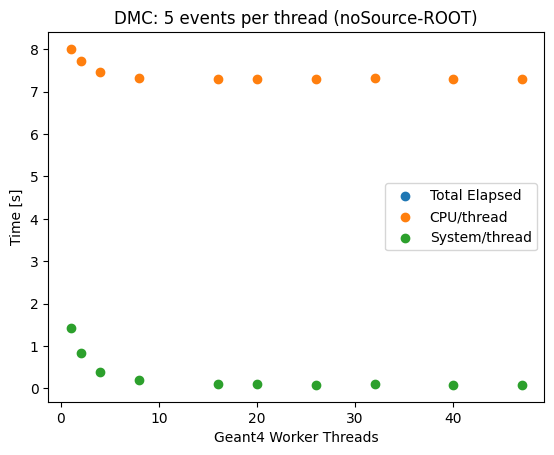

In [12]:
datadir = "data/threadTiming/V15-01-00"
files = glob.glob(os.path.join(datadir,"noSource*.root"))

jobtime = loadTimes(files)
jobtime["Elapsed"] = [ None for i in range(len(jobtime["Threads"]))]

plotTimes(jobtime,datadir,"noSource-ROOT")

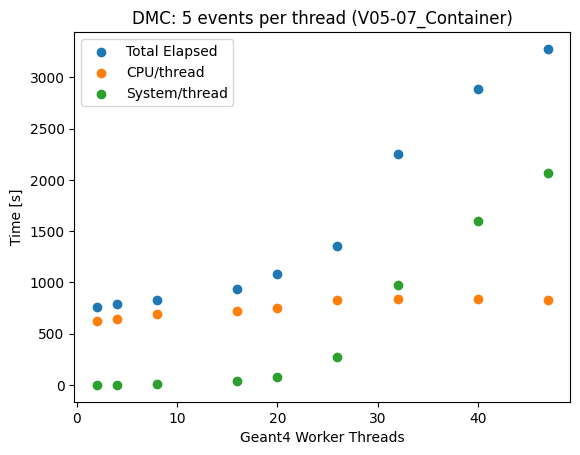

In [13]:
datadir = "data/threadTiming/V05-07"
files = glob.glob(os.path.join(datadir,"V05-07*.root"))
timeVsThread(files, datadir, "V05-07_Container")

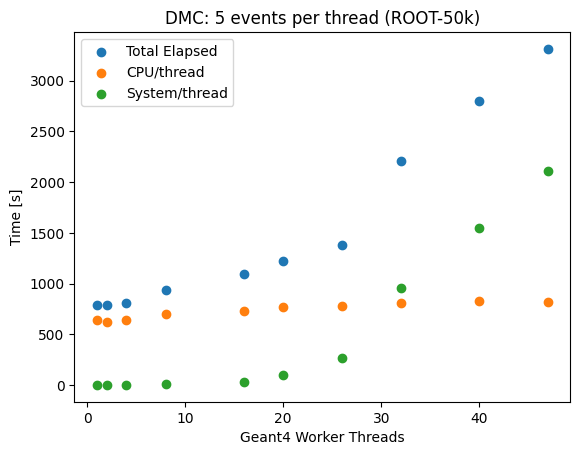

In [14]:
datadir = "data/threadTiming/ROOTIO"
files = glob.glob(os.path.join(datadir,"root50000-*.root"))
timeVsThread(files, datadir, "ROOT-50k")

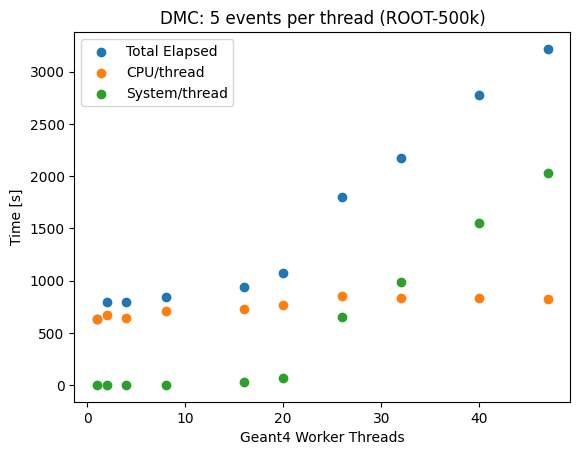

In [15]:
datadir = "data/threadTiming/ROOTIO"
files = glob.glob(os.path.join(datadir,"root500000-*.root"))
timeVsThread(files, datadir, "ROOT-500k")

In [16]:
datadir = "data/threadTiming/ROOTIO"
files50k = sorted(glob.glob(os.path.join(datadir,"root50000-*.root")))
files500k = sorted(glob.glob(os.path.join(datadir,"root500000-*.root")))
rootio = { "50k": loadTimes(files50k), "500k": loadTimes(files500k) }

In [17]:
difftimes = {}
difftimes["Threads"] = rootio["50k"]["Threads"]
difftimes["Events"] = rootio["50k"]["Events"]
for k in ["Elapsed","UserCPU","SystemCPU"]:
    difftimes[k] = rootio["500k"][k] - rootio["50k"][k]

difftimes["ThreadCPU"] = difftimes["UserCPU"]/difftimes["Threads"]
difftimes["ThreadSys"] = difftimes["SystemCPU"]/difftimes["Threads"]
difftimes["Overhead"] = difftimes["Elapsed"]-(difftimes["ThreadCPU"]+difftimes["ThreadSys"])

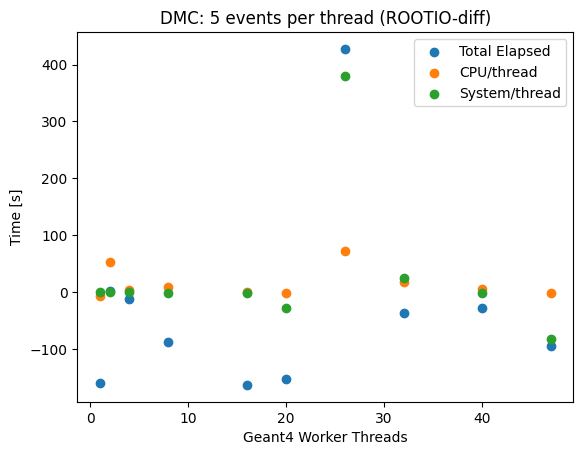

In [18]:
plotTimes(difftimes,datadir,"ROOTIO-diff")

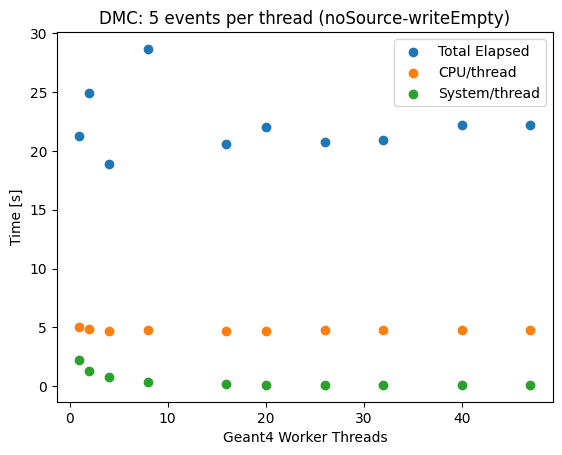

In [19]:
datadir = "data/threadTiming/V05-07"
files = glob.glob(os.path.join(datadir,"noSource-Empty*.root"))
timeVsThread(files, datadir, "noSource-writeEmpty")

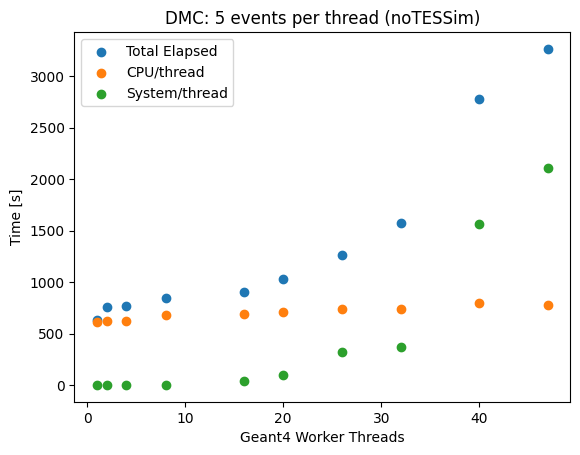

In [20]:
datadir = "data/threadTiming/V05-07"
files = glob.glob(os.path.join(datadir,"noTESSim*.root"))
timeVsThread(files, datadir, "noTESSim")